In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [2]:
data.rename(columns = {'v1':'spamornot'}, inplace = True)
data.rename(columns = {'v2':'contents'}, inplace = True)
data.rename(columns = {'Unnamed: 2':'col1'}, inplace = True)
data.rename(columns = {'Unnamed: 3':'col2'}, inplace = True)
data.rename(columns = {'Unnamed: 4':'col3'}, inplace = True)
data

,spamornot,contents,col1,col2,col3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   spamornot  5572 non-null   object
 1   contents   5572 non-null   object
 2   col1       50 non-null     object
 3   col2       12 non-null     object
 4   col3       6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.isnull().sum()

spamornot       0
contents        0
col1         5522
col2         5560
col3         5566
dtype: int64

In [5]:
data.describe()

,spamornot,contents,col1,col2,col3
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


([<matplotlib.patches.Wedge at 0x259d2a7d8b0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

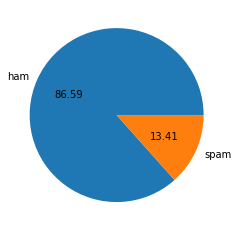

In [6]:
plt.pie(data['spamornot'].value_counts(),labels = ["ham","spam"],autopct = "%0.2f")

In [7]:
#nuber of unique values
counts = data.nunique()
counts

spamornot       2
contents     5169
col1           43
col2           10
col3            5
dtype: int64

In [8]:
#data["col1"] = pd.Categorical(data["col1"])
#data["col1"].dtype

In [9]:
unique_list1 = data['col1'].unique()
unique_list1

array([nan, ' PO Box 5249',
       ' the person is definitely special for u..... But if the person is so special',
       ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""',
       ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"',
       'this wont even start........ Datz confidence.."', 'GN',
       '.;-):-D"',
       'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""',
       ' bt not his girlfrnd... G o o d n i g h t . . .@"',
       ' I\'ll come up"',
       ' don\'t miss ur best life for anything... Gud nyt..."',
       ' just as a shop has to give a guarantee on what they sell. B. G."',
       ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"',
       ' the toughest is acting Happy with all unspoken pain inside..\\""',
       ' smoke hella weed\\""', '\\" not \\"what i need to do.\\""',
       'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD

In [10]:
unique_list2 = data['col2'].unique()
unique_list2

array([nan, ' MK17 92H. 450Ppw 16"', ' why to miss them', 'GE',
       'U NO THECD ISV.IMPORTANT TOME 4 2MORO\\""',
       'i wil tolerat.bcs ur my someone..... But',
       ' ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\\""',
       'whoever is the KING\\"!... Gud nyt"', ' TX 4 FONIN HON',
       ' \\"OH No! COMPETITION\\". Who knew', 'IåÕL CALL U\\""'],
      dtype=object)

In [11]:
unique_list3 = data['col3'].unique()
unique_list3 

array([nan, ' just Keep-in-touch\\" gdeve.."', 'GNT:-)"',
       ' Never comfort me with a lie\\" gud ni8 and sweet dreams"',
       ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""',
       ' one day these two will become FREINDS FOREVER!"'], dtype=object)

In [12]:
data['full_message'] = data['contents'].astype(str) + data['col1'].astype(str) + data['col2'].astype(str) + data['col3'].astype(str)
data

,spamornot,contents,col1,col2,col3,full_message
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,Ok lar... Joking wif u oni...nannannan
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,Will Ì_ b going to esplanade fr home?nannannan
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,The guy did some bitching but I acted like i'd...


In [13]:
new_data = data[['spamornot', 'full_message']]
new_data

,spamornot,full_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...nannannan
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?nannannan
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
new_data.isnull().sum()

spamornot       0
full_message    0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ( )
le.fit (new_data.spamornot) 

LabelEncoder()

In [18]:
 
new_data['spamornot'].unique()
 
le.transform(new_data.spamornot)
new_data['spamornot']=le.fit_transform (new_data.spamornot)

C:\Users\walid\AppData\Local\Temp\ipykernel_16508\3644608046.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['spamornot']=le.fit_transform (new_data.spamornot)


In [19]:
new_data.head()

,spamornot,full_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...nannannan
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
messages=new_data['full_message']
print (messages)


0       Go until jurong point, crazy.. Available only ...
1                  Ok lar... Joking wif u oni...nannannan
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568       Will Ì_ b going to esplanade fr home?nannannan
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                  Rofl. Its true to its namenannannan
Name: full_message, Length: 5572, dtype: object


In [21]:
cv = CountVectorizer()

In [39]:
Xx= cv.fit_transform(messages) 

print (Xx)

  (0, 3873)	1
  (0, 8781)	1
  (0, 4749)	1
  (0, 6474)	1
  (0, 2541)	1
  (0, 1427)	1
  (0, 6052)	1
  (0, 4465)	1
  (0, 1918)	1
  (0, 3964)	1
  (0, 9284)	1
  (0, 4882)	1
  (0, 1915)	1
  (0, 2247)	1
  (0, 8339)	1
  (0, 3923)	1
  (0, 1176)	1
  (0, 9037)	1
  (0, 5737)	1
  (1, 5737)	1
  (1, 6014)	1
  (1, 4921)	1
  (1, 4714)	1
  (1, 9175)	1
  (1, 6048)	1
  :	:
  (5570, 9089)	1
  (5570, 1192)	1
  (5570, 5039)	1
  (5570, 7687)	1
  (5570, 3609)	1
  (5570, 8316)	1
  (5570, 1575)	1
  (5570, 5823)	1
  (5570, 2821)	1
  (5570, 1947)	1
  (5570, 7697)	1
  (5570, 3154)	1
  (5570, 3788)	1
  (5570, 1955)	1
  (5570, 8819)	1
  (5570, 4021)	1
  (5570, 4544)	1
  (5570, 3672)	1
  (5570, 987)	1
  (5570, 1693)	1
  (5571, 8467)	1
  (5571, 4616)	2
  (5571, 8617)	1
  (5571, 7103)	1
  (5571, 5729)	1


In [40]:
sorted(cv.vocabulary_.keys())

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '04nannannan',
 '05',
 '050703',
 '0578',
 '05nannannan',
 '06',
 '07',
 '07008009200nannannan',
 '07046744435',
 '07090201529nannannan',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117nannannan',
 '077xxx',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901nannannan',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '078nannannan',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000930705nannannan',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030nannannan',
 '08002986906',
 '08002986906nannannan',
 '08002988890',
 '0800634

In [46]:
X = Xx
Y = new_data.spamornot

In [53]:
Xx

<5572x9495 sparse matrix of type '<class 'numpy.int64'>'
	with 77925 stored elements in Compressed Sparse Row format>

In [54]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train , y_test = train_test_split(X,Y, test_size=0.2 )

In [57]:
from sklearn.naive_bayes import MultinomialNB
model =MultinomialNB()
model.fit(x_train , y_train)
model.score(x_test,y_test)

0.9811659192825112

In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier (n_neighbors =5, metric ="minkowski" ,p =2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:
import pickle

In [59]:
pickle.dump(model , open("spam.pkl","wb"))

In [60]:
 pickle.dump(cv,open("vectorizer.pki","wb"))

In [62]:
cc=pickle.load (open("spam.pkl","rb"))

In [65]:
msg="You Won 500%%% يلارتعاغ"
data = [msg]
vect = cv.transform(data).toarray()
result = model.predict(vect)
print(result)

[1]


In [66]:
msg="hey , i hope you are doing well"
data = [msg]
vect = cv.transform(data).toarray()
result = model.predict(vect)
print(result)

[0]
